In [6]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [87]:
consumerKey = 'HFQ4Q2lpgyv8MxP4iQF5icimc'
consumerSecret = 'tmt5wTAiHEQXvjpDcd0Ph1KrH4Lg9fxjT5pHn0rz6PA0blsBkK'
accessToken = '1509962661844307969-QtjrQDIUSZT0NO1ZOf7iKXa1phViF1'
accessTokenSecret = 'gmjt6v6rNqIwJ97HYul6gutPcMw8u9J4Zan9De9o7G0Pg'



In [88]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [284]:
# posts = api.user_timeline(screen_name="ElonMusk", count = 100, tweet_mode="extended")


# print("Show the 5 recent tweets: \n")

# i = 1

# for tweet in posts[0:5]:
#     print(str(i) + ') ' + tweet.full_text + '\n')
#     i += 1

#Searach by keywords

data = []
columns = ['User', 'Tweets']

posts = tweepy.Cursor(api.search_tweets, q="Duragesic OR Fentanyl OR Hydrocodone OR Hydros OR Oxy OR Oxycodone OR Oxycotin OR Oxycotton OR Vicodin OR Vikes OR Oxycontin", tweet_mode = "extended").items(100)

for tweet in posts:
    data.append([tweet.user.screen_name, tweet.full_text])
    
df = pd.DataFrame(data, columns=columns)
df

# i= 1
# for tweet in posts:
#     print(str(i) + ')' +  tweet.full_text + '\n')
#     i += 1



,User,Tweets
0,Twolfrecovery,@JennyChachan The organized drug dealers have ...
1,quotes_omega,Oxy... Oxy!
2,JackLtila,"RT @SenatorHagerty: On the Rio Grande River, w..."
3,Reyes79Julio,RT @michael_david41: OxyContin (heroin) dealer...
4,samicakes,RT @Dante_333_: @Sprite @McDonalds This combo ...
...,...,...
95,jyushisirin_oxy,しみず
96,jyushisirin_oxy,RT @keinakasawa: 4/3は清水（谷）の日 https://t.co/gwuo...
97,SenateGOP,"RT @SenatorHagerty: On the Rio Grande River, w..."
98,tozenmybeloved,@yantaosolos two hydros is actually good for k...


In [285]:
# df = pd.DataFrame([tweet.full_text], columns=['Tweets'])

# df

# print(tweet.full_text)

In [286]:
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
                  
    return text
                  
                  
df['Tweets'] = df['Tweets'].apply(cleanText)
df

,User,Tweets
0,Twolfrecovery,The organized drug dealers have a good busine...
1,quotes_omega,Oxy... Oxy!
2,JackLtila,": On the Rio Grande River, where every day car..."
3,Reyes79Julio,_david41: OxyContin (heroin) dealer testifying...
4,samicakes,_333_: This combo stronger than fentanyl
...,...,...
95,jyushisirin_oxy,しみず
96,jyushisirin_oxy,: 4/3は清水（谷）の日
97,SenateGOP,": On the Rio Grande River, where every day car..."
98,tozenmybeloved,two hydros is actually good for kokomi it inc...


In [287]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,User,Tweets,Subjectivity,Polarity
0,Twolfrecovery,The organized drug dealers have a good busine...,0.716667,0.516667
1,quotes_omega,Oxy... Oxy!,0.000000,0.000000
2,JackLtila,": On the Rio Grande River, where every day car...",0.000000,0.000000
3,Reyes79Julio,_david41: OxyContin (heroin) dealer testifying...,0.500000,-0.500000
4,samicakes,_333_: This combo stronger than fentanyl,0.000000,0.000000
...,...,...,...,...
95,jyushisirin_oxy,しみず,0.000000,0.000000
96,jyushisirin_oxy,: 4/3は清水（谷）の日,0.000000,0.000000
97,SenateGOP,": On the Rio Grande River, where every day car...",0.000000,0.000000
98,tozenmybeloved,two hydros is actually good for kokomi it inc...,0.600000,0.700000


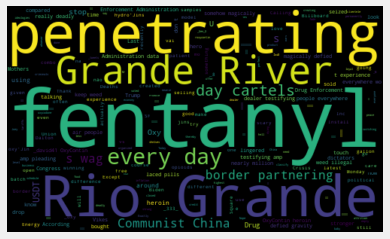

In [288]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)


plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [289]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,User,Tweets,Subjectivity,Polarity,Analysis
0,Twolfrecovery,The organized drug dealers have a good busine...,0.716667,0.516667,Positive
1,quotes_omega,Oxy... Oxy!,0.000000,0.000000,Neutral
2,JackLtila,": On the Rio Grande River, where every day car...",0.000000,0.000000,Neutral
3,Reyes79Julio,_david41: OxyContin (heroin) dealer testifying...,0.500000,-0.500000,Negative
4,samicakes,_333_: This combo stronger than fentanyl,0.000000,0.000000,Neutral
...,...,...,...,...,...
95,jyushisirin_oxy,しみず,0.000000,0.000000,Neutral
96,jyushisirin_oxy,: 4/3は清水（谷）の日,0.000000,0.000000,Neutral
97,SenateGOP,": On the Rio Grande River, where every day car...",0.000000,0.000000,Neutral
98,tozenmybeloved,two hydros is actually good for kokomi it inc...,0.600000,0.700000,Positive


In [290]:
j = 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' +sortedDF['Tweets'][i])
        print()
        j += 1

1)  The organized drug dealers have a good business model. Promote the product, get you strung out thereby creating a loyal clientele. They even offer credit. Except with Fentanyl, everyone is dying so they're switching to an attrition model now.

2) : “If fentanyl was really deadly to the touch or somehow magically defied gravity and lingered in the air, people everywhere wo…

3) : “If fentanyl was really deadly to the touch or somehow magically defied gravity and lingered in the air, people everywhere wo…

4) : “If fentanyl was really deadly to the touch or somehow magically defied gravity and lingered in the air, people everywhere wo…

5) I need my fade with whoever created oxycodone and roxycontin cuz why the hell would you make something so perfect

6) _Gen_0 _tweets  _M Exactly.  Dictators are dictators are dictators.  They couldn't care less about political ideologies.

7)   Nope the Biden open borders to the criminals and fentanyl,Biden’s inflation,empty food shelves and 7.00 a

In [291]:
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' +sortedDF['Tweets'][i])
        print()
        j += 1

1) _david41: OxyContin (heroin) dealer testifying &amp; pleading to Congress to keep weed illegal so we don’t experience a drop in hero…

2) : Today I voted to permanently classify fentanyl as a schedule 1 drug, the highest level for illegality. Unfortunately, Democra…

3) _david41: OxyContin (heroin) dealer testifying &amp; pleading to Congress to keep weed illegal so we don’t experience a drop in hero…

4) _david41: OxyContin (heroin) dealer testifying &amp; pleading to Congress to keep weed illegal so we don’t experience a drop in hero…

5)   No one cares about fentanyl, no one's putting a gun to their head to take it, it's just poor parenting. If america wanted stop fentanyl it could, US police have nearly same budget as Chinese military ffs. It just shows US doesn't want it to stop

6)  There is no safe fentanyl use amount except when administered by an anesthesiologist, and there are lit POUNDS of it here. Burnt tin foil everywhere. Also there is something meaner going around.

7

Text(0, 0.5, 'Subjectivity')

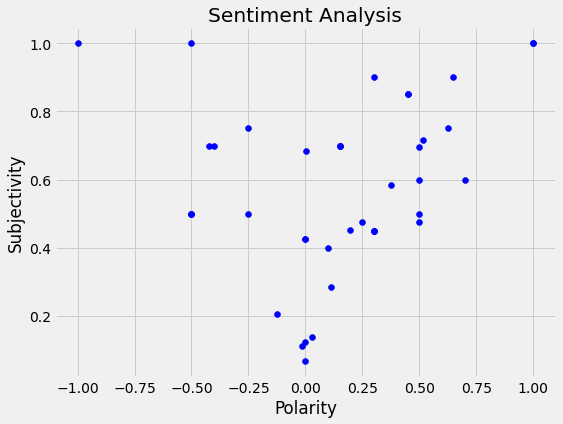

In [292]:
plt.figure(figsize=(8,6))
for i in range (0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [293]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]) * 100, 1)

26.0

In [294]:
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0] * 100), 1)

11.0

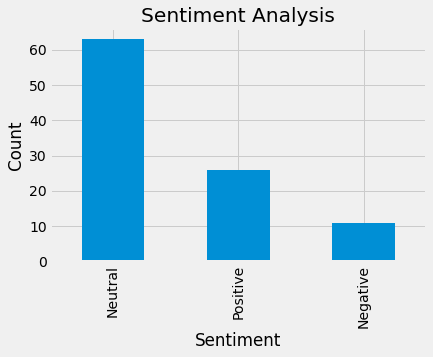

In [295]:
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()